# sprint データセット作成

# 【 問題1】自作データセットでの分類の学習

In [1]:
import tensorflow as tf

In [2]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

import cv2
from PIL import Image

%matplotlib inline

In [3]:
path = '../training' 
flist = os.listdir(path)

In [4]:
!ls -a ../training

.         .DS_Store cat.2.jpg cat.4.jpg dog.1.jpg dog.3.jpg dog.5.jpg
..        cat.1.jpg cat.3.jpg cat.5.jpg dog.2.jpg dog.4.jpg


In [5]:
flist

['cat.5.jpg',
 'cat.4.jpg',
 '.DS_Store',
 'cat.1.jpg',
 'cat.3.jpg',
 'cat.2.jpg',
 'dog.1.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.4.jpg',
 'dog.5.jpg']

In [6]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''


flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat.5.jpg',
 'cat.4.jpg',
 'cat.1.jpg',
 'cat.3.jpg',
 'cat.2.jpg',
 'dog.1.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.4.jpg',
 'dog.5.jpg']

In [7]:
img_list = glob.glob(path + '/*' + ".jpg")

In [8]:
img_list 

['../training/cat.5.jpg',
 '../training/cat.4.jpg',
 '../training/cat.1.jpg',
 '../training/cat.3.jpg',
 '../training/cat.2.jpg',
 '../training/dog.1.jpg',
 '../training/dog.2.jpg',
 '../training/dog.3.jpg',
 '../training/dog.4.jpg',
 '../training/dog.5.jpg']

In [9]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:#or_img_list
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        



In [17]:
path_test = '../testing' 
img_list_test = glob.glob(path_test + '/*' + ".jpg")

In [34]:
img_list_test

['../testing/cat.5.jpg',
 '../testing/cat.4.jpg',
 '../testing/cat.1.jpg',
 '../testing/cat.3.jpg',
 '../testing/cat.2.jpg',
 '../testing/dog.1.jpg',
 '../testing/dog.2.jpg',
 '../testing/dog.3.jpg',
 '../testing/dog.4.jpg',
 '../testing/dog.5.jpg']

#test

In [18]:
# np.resizeはだめ、ぜったい

dog_img_array_test = np.empty((0,224,224,3))
cat_img_array_test = np.empty((0,224,224,3))

for img in img_list_test:#or_img_list
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array_test = np.concatenate([dog_img_array_test, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array_test = np.concatenate([cat_img_array_test, cat_img], axis = 0)
        



In [19]:
dog_img_array_test.shape

(5, 224, 224, 3)

In [20]:
cat_img_array_test.shape

(5, 224, 224, 3)

In [21]:
cat_img_array.shape

(5, 224, 224, 3)

In [22]:
dog_img_array.shape

(5, 224, 224, 3)

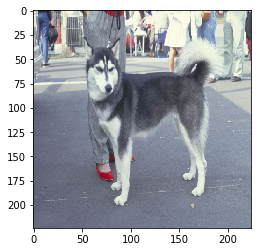

In [23]:
# 配列を画像として出力

plt.imshow(dog_img_array[4])

plt.show()

In [24]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [25]:
print(f'{dog_img_array.shape}')

(5, 224, 224, 3)


結合

In [38]:
X = np.concatenate([cat_img_array, dog_img_array], axis = 0)

In [39]:
X.shape

(10, 224, 224, 3)

In [41]:
X_test = np.concatenate([cat_img_array_test, dog_img_array_test], axis = 0)

In [42]:
X_test.shape

(10, 224, 224, 3)

In [32]:
Y = []
for i in  img_list:
    if re.search('dog', i):
        Y.append(1)
    else:
        Y.append(0)
Y

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

#test_rabel作成

In [33]:
Y_test = []
for i in  img_list_test:
    if re.search('dog', i):
        Y_test.append(1)
    else:
        Y_test.append(0)
Y_test

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers


Using TensorFlow backend.


In [40]:
model = Sequential()

model.add(Conv2D(16, (2,2),activation = "relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(200,  activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(200, activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(1,activation="sigmoid"))


# オプティマイザにAdamを使用
opt = optimizers.Adam(lr=0.001)
# モデルをコンパイル
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
# 学習を実行。10%はテストに使用。
# model.fit(image_list, Y, nb_epoch=100, batch_size=10, validation_split=0.1)
model.fit(X, Y, nb_epoch=20)

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
10/10 [==============================] - 1s 102ms/step - loss: 0.7149 - accuracy: 0.4000
Epoch 2/20
10/10 [==============================] - 0s 31ms/step - loss: 1.1681 - accuracy: 0.7000
Epoch 3/20
10/10 [==============================] - 0s 31ms/step - loss: 2.1808 - accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 0s 29ms/step - loss: 2.1636 - accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 0s 31ms/step - loss: 0.5853 - accuracy: 0.7000
Epoch 6/20
10/10 [==============================] - 0s 30ms/step - loss: 0.6718 - accuracy: 0.8000
Epoch 7/20
10/10 [==============================] - 0s 30ms/step - loss: 1.8446 - accuracy: 0.5000
Epoch 8/20
10/10 [==============================] - 0s 31ms/step - loss: 0.8362 - accuracy: 0.7000
Epoch 9/20
10/10 [==============================] - 0s 30ms/step - loss: 0.7210 - accuracy: 0.8000
Epoch 10/20
10/10 [==============================] - 0s 34ms/step - loss: 0.5855 - accuracy: 0.8000
Epoch 11

In [43]:
Y_pred = np.round(model.predict(X_test))

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[1, 4],
       [0, 5]])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.6

# 【問題2】分類データセットに対するデータ拡張

In [47]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [60]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
 
# 入力ディレクトリを作成
input_dir = "../photos_dog"
files = glob.glob(input_dir + '/*.jpg')
print(files)
 
# 出力ディレクトリを作成
output_dir = "photo_out_mix"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
 
  
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='dog', save_format='jpg')
    for i in range(51):
        batch = g.next()

['../photos_dog/dog.1.jpg', '../photos_dog/dog.2.jpg', '../photos_dog/dog.3.jpg', '../photos_dog/dog.4.jpg', '../photos_dog/dog.5.jpg']


In [63]:
# 入力ディレクトリを作成
input_dir = "../photos_cat"
files = glob.glob(input_dir + '/*.jpg')
 
# 出力ディレクトリを作成
output_dir = "photo_out_mix"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
 
    # 9個の画像を生成します
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='cat', save_format='jpg')
    for i in range(51):
        batch = g.next()

In [64]:
path3 = "photo_out_mix"

In [68]:
img_list_mix = glob.glob(path3 + '/*' + ".jpg")
img_list_mix

['photo_out_mix/cat_0_5314.jpg',
 'photo_out_mix/dog_0_2700.jpg',
 'photo_out_mix/dog_0_6200.jpg',
 'photo_out_mix/dog_0_3436.jpg',
 'photo_out_mix/dog_0_7650.jpg',
 'photo_out_mix/cat_0_5499.jpg',
 'photo_out_mix/dog_0_7122.jpg',
 'photo_out_mix/cat_0_5664.jpg',
 'photo_out_mix/cat_0_5116.jpg',
 'photo_out_mix/dog_0_7308.jpg',
 'photo_out_mix/cat_0_4585.jpg',
 'photo_out_mix/cat_0_6225.jpg',
 'photo_out_mix/dog_0_9245.jpg',
 'photo_out_mix/dog_0_3740.jpg',
 'photo_out_mix/cat_0_4624.jpg',
 'photo_out_mix/dog_0_9047.jpg',
 'photo_out_mix/cat_0_8787.jpg',
 'photo_out_mix/dog_0_29.jpg',
 'photo_out_mix/dog_0_7057.jpg',
 'photo_out_mix/cat_0_949.jpg',
 'photo_out_mix/cat_0_9301.jpg',
 'photo_out_mix/cat_0_9473.jpg',
 'photo_out_mix/cat_0_752.jpg',
 'photo_out_mix/cat_0_2917.jpg',
 'photo_out_mix/dog_0_1618.jpg',
 'photo_out_mix/cat_0_578.jpg',
 'photo_out_mix/cat_0_5077.jpg',
 'photo_out_mix/dog_0_6956.jpg',
 'photo_out_mix/dog_0_8562.jpg',
 'photo_out_mix/cat_0_6620.jpg',
 'photo_out_mix

In [69]:
d_img_array = np.empty((0,224,224,3))


for img in img_list_mix:

    d_img = Image.open(img)

    # サイズを揃える
    d_img = d_img.resize((224, 224))

    # PIL.Image.Imageからnumpy配列へ
    d_img = np.array(d_img)

    # 正規化
    d_img = d_img / 255.0

    # axisの追加
    d_img = d_img.reshape((1,224,224,3))

    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)

print(d_img_array.shape)
X = d_img_array

(501, 224, 224, 3)


In [70]:
Y = []
for i in  img_list_mix:
    if re.search('dog', i):
        Y.append(1)
    else:
        Y.append(0)
Y

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,


In [71]:
model = Sequential()

model.add(Conv2D(16, (2,2),activation = "relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(3,3))

model.add(Flatten())

model.add(Dense(200,  activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(200, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))


# オプティマイザにAdamを使用
opt = optimizers.Adam(lr=0.001)
# モデルをコンパイル
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# model.fit(image_list, Y, nb_epoch=100, batch_size=10, validation_split=0.1)
model.fit(X, Y, nb_epoch=15,  batch_size=50, validation_split=0.1)

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 450 samples, validate on 51 samples
Epoch 1/15
450/450 [==============================] - 7s 16ms/step - loss: 0.7385 - accuracy: 0.5178 - val_loss: 0.6770 - val_accuracy: 0.5294
Epoch 2/15
450/450 [==============================] - 7s 15ms/step - loss: 0.6789 - accuracy: 0.5889 - val_loss: 0.6604 - val_accuracy: 0.6667
Epoch 3/15
450/450 [==============================] - 7s 15ms/step - loss: 0.6247 - accuracy: 0.7311 - val_loss: 0.5759 - val_accuracy: 0.7451
Epoch 4/15
450/450 [==============================] - 8s 17ms/step - loss: 0.5094 - accuracy: 0.7756 - val_loss: 0.4383 - val_accuracy: 0.7843
Epoch 5/15
450/450 [==============================] - 8s 17ms/step - loss: 0.4295 - accuracy: 0.7889 - val_loss: 0.4217 - val_accuracy: 0.7647
Epoch 6/15
450/450 [==============================] - 7s 15ms/step - loss: 0.2819 - accuracy: 0.8956 - val_loss: 0.2563 - val_accuracy: 0.8824
Epoch 7/15
450/450 [==============================] - 7s 15ms/step - loss: 0.1945 - accuracy: 0.9

In [72]:
Y_pred = np.round(model.predict(X_test))

In [73]:
confusion_matrix(Y_test, Y_pred)

array([[4, 1],
       [1, 4]])

In [74]:
accuracy_score(Y_test, Y_pred)

0.8

# 【問題3】物体検出データセットの用意

In [76]:
#!pip3 install labelImg

     |████████████████████████████████| 248 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 43.1 MB 6.2 MB/s eta 0:00:01     |█████████▍                      | 12.6 MB 4.6 MB/s eta 0:00:07     |████████████████████▉           | 28.1 MB 6.5 MB/s eta 0:00:03     |████████████████████████████████| 42.9 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 5.2 MB/s eta 0:00:011
ERROR: spyder 3.3.6 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
ERROR: spyder 3.3.6 has requirement pyqt5<5.13; python_version >= "3", but you'll have pyqt5 5.14.1 which is incompatible.


In [75]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [82]:
def download_image(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [77]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(10,40))
    plt.imshow(img)
    return img

In [78]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [90]:
path_cat = '../photos_cat' 
img_list_cat = glob.glob(path_cat + '/*' + ".jpg")
img_list_cat

['../photos_cat/cat.5.jpg',
 '../photos_cat/cat.4.jpg',
 '../photos_cat/cat.1.jpg',
 '../photos_cat/cat.3.jpg',
 '../photos_cat/cat.2.jpg']

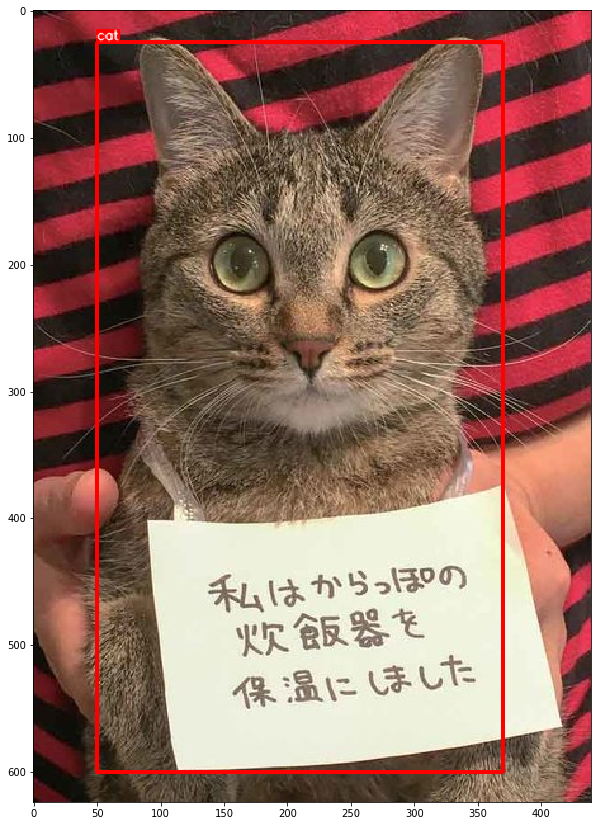

In [113]:
image = download_image(img_list_cat[0])
image = np.array(image)



annotations = {'image': image, 'bboxes': [[50,25,370,600]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/shinoda/diveintocode-ml/annotations_list/cat1_img.jpg")

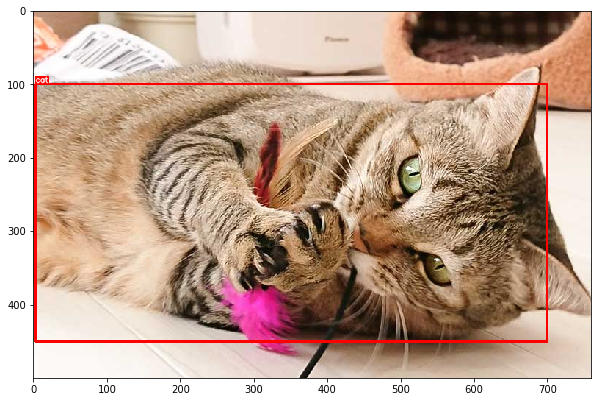

In [118]:
image = download_image(img_list_cat[1])
image = np.array(image)


annotations = {'image': image, 'bboxes': [[3,100,700,450]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)



In [119]:
pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/shinoda/diveintocode-ml/annotations_list/cat2_img.jpg")

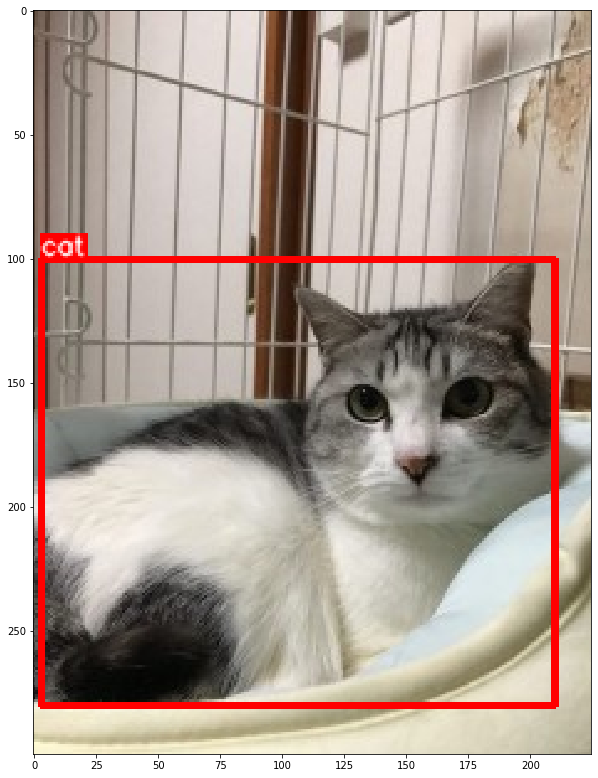

In [125]:
image = download_image(img_list_cat[2])
image = np.array(image)


annotations = {'image': image, 'bboxes': [[3,100,210,280]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

In [126]:
pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/shinoda/diveintocode-ml/annotations_list/cat3_img.jpg")

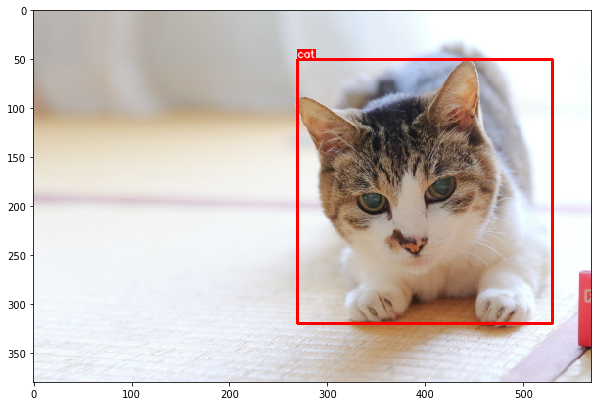

In [141]:
image = download_image(img_list_cat[3])
image = np.array(image)


annotations = {'image': image, 'bboxes': [[270,50,530,320]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

In [142]:
pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/shinoda/diveintocode-ml/annotations_list/cat4_img.jpg")

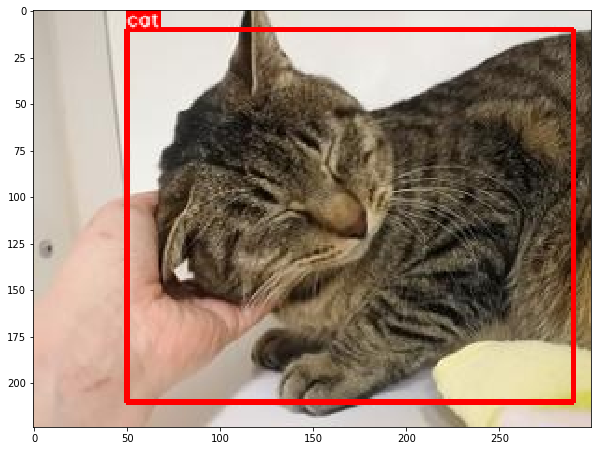

In [143]:
image = download_image(img_list_cat[4])
image = np.array(image)


annotations = {'image': image, 'bboxes': [[50,10,290,210]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

In [144]:
pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/shinoda/diveintocode-ml/annotations_list/cat5_img.jpg")

In [145]:
path_dog = '../photos_dog' 
img_list_dog = glob.glob(path_dog + '/*' + ".jpg")
img_list_dog

['../photos_dog/dog.1.jpg',
 '../photos_dog/dog.2.jpg',
 '../photos_dog/dog.3.jpg',
 '../photos_dog/dog.4.jpg',
 '../photos_dog/dog.5.jpg']

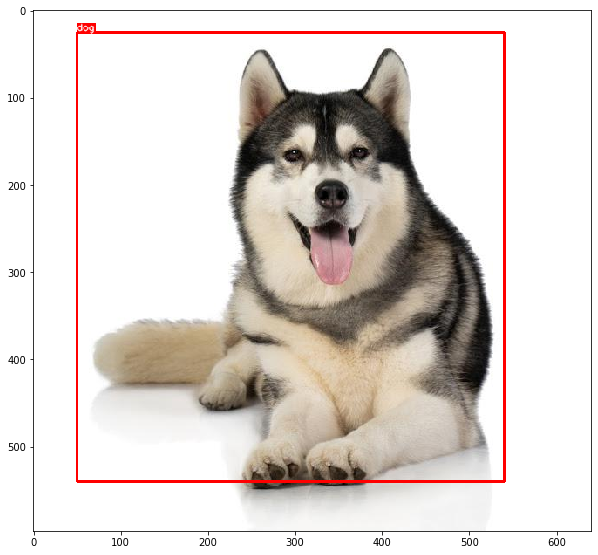

In [149]:
image = download_image(img_list_dog[0])
image = np.array(image)



annotations = {'image': image, 'bboxes': [[50,25,540,540]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)


In [150]:

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/shinoda/diveintocode-ml/annotations_list/dog1_img.jpg")

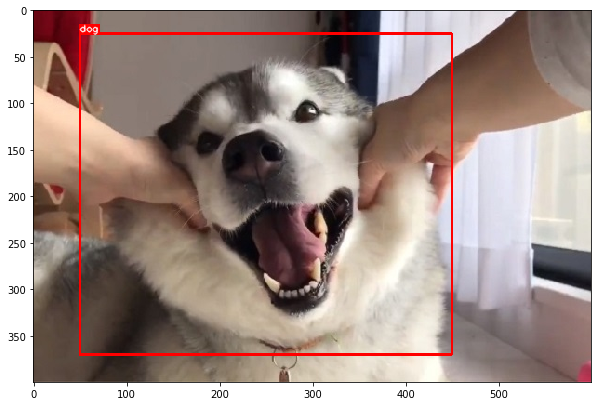

In [152]:
image = download_image(img_list_dog[1])
image = np.array(image)



annotations = {'image': image, 'bboxes': [[50,25,450,370]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)


In [153]:
pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/shinoda/diveintocode-ml/annotations_list/dog2_img.jpg")

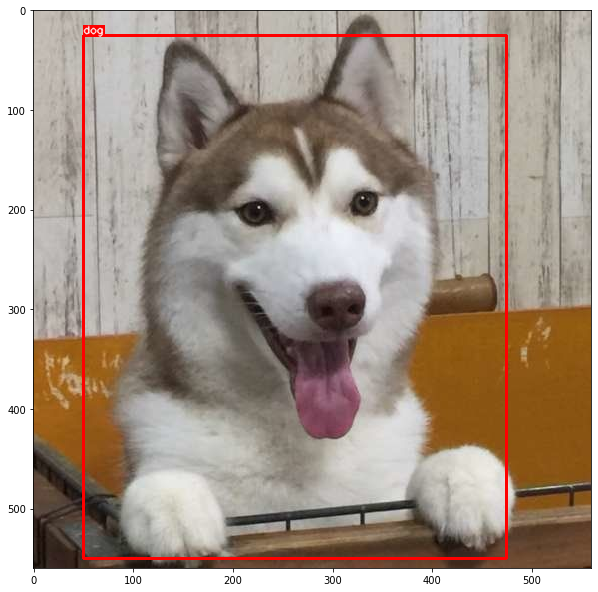

In [157]:
image = download_image(img_list_dog[2])
image = np.array(image)



annotations = {'image': image, 'bboxes': [[50,25,475,550]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

In [158]:
pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/shinoda/diveintocode-ml/annotations_list/dog3_img.jpg")

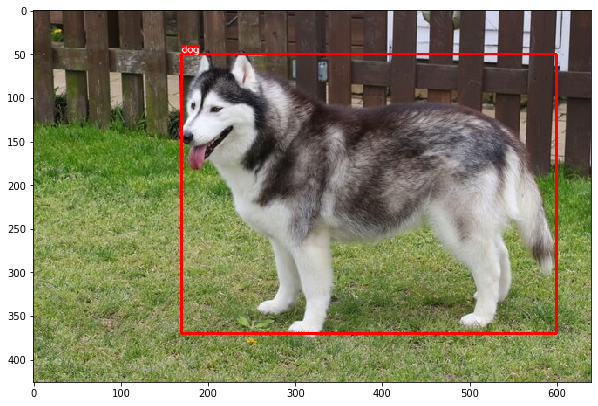

In [162]:
image = download_image(img_list_dog[3])
image = np.array(image)



annotations = {'image': image, 'bboxes': [[170,50,600,370]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

In [163]:
pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/shinoda/diveintocode-ml/annotations_list/dog4_img.jpg")

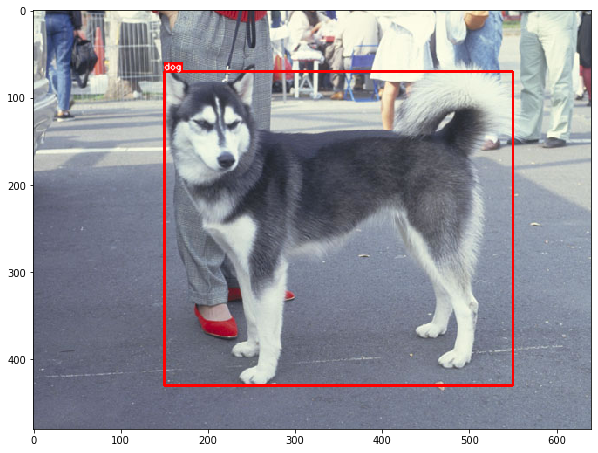

In [167]:
image = download_image(img_list_dog[4])
image = np.array(image)



annotations = {'image': image, 'bboxes': [[150,70,550,430]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

In [168]:
pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/shinoda/diveintocode-ml/annotations_list/dog5_img.jpg")

# 【問題4】物体検出データセットに対するデータ拡張

In [183]:
# 入力ディレクトリを作成
input_dir = "../annotations_list"
files = glob.glob(input_dir + '/*.jpg')
 
# 出力ディレクトリを作成
output_dir = "../annotations_list_mix"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
 

    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='dog', save_format='jpg')
    for i in range(51):
        batch = g.next()